In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/NUS_GAIP_GRP9/HPE Project/Datasets/Merged_food.csv')

In [ ]:
updated_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180810,1245138,141,27,1847,194.00,196.00,0,0,163,713,85,TYPE_A,4.5,Soup,Thai
180811,1290209,142,27,1847,195.00,195.00,0,0,190,713,85,TYPE_A,4.5,Soup,Thai
180812,1073275,143,27,1847,196.00,196.00,0,0,244,713,85,TYPE_A,4.5,Soup,Thai
180813,1464574,144,27,1847,196.00,194.00,0,0,108,713,85,TYPE_A,4.5,Soup,Thai


In [ ]:
df['num_orders'].max()

24299

In [ ]:
len(df['meal_id'].unique())

51

In [ ]:
# Extract only the time series which have data of all 145 weeks
col_name=df.columns
updated_df=pd.DataFrame(columns=col_name)

for x in df['meal_id'].unique():
  #print('meal_id={}'.format(x))
  for y in df['center_id'].unique():
    #print('center_id={}'.format(y))
    j=0
    temp=df[df['center_id']==y]
    temp=temp[temp['meal_id']==x]
    if temp.empty:
      continue
    if len(temp)!=145:
     #print("skipped{} {}".format(x,y))
      continue
    updated_df=pd.concat([updated_df,temp])

In [ ]:
updated_df.to_csv('/content/drive/MyDrive/NUS_GAIP_GRP9/HPE Project/Datasets/Extracted_food.csv')
updated_df

In [4]:
updated_df=pd.read_csv(('/content/drive/MyDrive/NUS_GAIP_GRP9/HPE Project/Datasets/Extracted_food.csv'))

In [5]:
updated_df['center_id'].unique()

0         55
1         55
2         55
3         55
4         55
          ..
180810    27
180811    27
180812    27
180813    27
180814    27
Name: center_id, Length: 180815, dtype: int64

In [ ]:
updated_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [ ]:
def calc_mean(col):
  return col.mean()

In [ ]:
data_new = pd.DataFrame(updated_df.groupby(['center_id','week']).agg({'num_orders':sum,'base_price':calc_mean}))
data_new = data_new.reset_index()
temp = data_new

In [ ]:
data_new.columns

Index(['center_id', 'week', 'num_orders', 'base_price'], dtype='object')

In [ ]:
dummy=pd.get_dummies(data_new['center_id'], prefix=['center_id'])

In [ ]:
data_new = pd.merge(data_new,dummy,on=data_new.index)

In [ ]:
data_new.drop(['key_0','center_id'],axis=1,inplace=True)

In [ ]:
'''updated_df['grouped_orders'] = updated_df['center_id'].map(temp)
updated_df['mean_base_price']'''

"updated_df['grouped_orders'] = updated_df['center_id'].map(temp)\nupdated_df['mean_base_price']"

In [ ]:
'''updated_df.drop(['num_orders', 'meal_id'], axis=1, inplace=True)'''

"updated_df.drop(['num_orders', 'meal_id'], axis=1, inplace=True)"

In [ ]:
#updated_df=updated_df.drop_duplicates()

In [ ]:
#plt.plot(updated_df['grouped_orders'])

In [ ]:
train = data_new[data_new['week'].isin(range(1,100))]
val = data_new[data_new['week'].isin(range(100,130))]
test = data_new[data_new['week'].isin(range(130,146))]
print(len(train), len(val), len(test))

7524 2280 1216


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
scaler.fit(np.array(train[['num_orders']]).reshape(-1,1))
train['num_orders'] = scaler.transform(np.array(train[['num_orders']]).reshape(-1,1))
val['num_orders'] = scaler.transform(np.array(val[['num_orders']]).reshape(-1,1))
test['num_orders'] = scaler.transform(np.array(test[['num_orders']]).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
dir(scaler)
scaler.__getstate__()

{'_sklearn_version': '0.22.2.post1',
 'center_': array([6344.]),
 'copy': True,
 'quantile_range': (25.0, 75.0),
 'scale_': array([5512.5]),
 'with_centering': True,
 'with_scaling': True}

In [ ]:
-0.4721880257129669*5512.5+6344

3741.06350825727

In [ ]:
scaler.inverse_transform(np.array(-0.4721880257129669).reshape(-1,1))

array([[3741.06350826]])

In [ ]:
scaler.fit(np.array(train[['base_price']]).reshape(-1,1))
train['base_price'] = scaler.transform(np.array(train[['base_price']]).reshape(-1,1))
val['base_price'] = scaler.transform(np.array(val[['base_price']]).reshape(-1,1))
test['base_price'] = scaler.transform(np.array(test[['base_price']]).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
val['base_price']

99       0.864192
100      0.888691
101      0.884252
102      0.892728
103      0.867059
           ...   
10999   -0.925913
11000   -0.868598
11001   -0.827750
11002   -0.806622
11003   -0.941171
Name: base_price, Length: 2280, dtype: float64

In [ ]:
X_train = train.drop('num_orders',axis=1)
y_train = train['num_orders']

X_val = val.drop('num_orders',axis=1)
y_val = val['num_orders']

X_test = test.drop('num_orders',axis=1)
y_test = test['num_orders']

X_train=np.array(X_train)
X_val=np.array(X_val)
X_test=np.array(X_test)

In [ ]:
X_train[1]

array([2.        , 1.01656285, 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
def create_dataset(X, y, time_steps=1, weeks=100):
    Xs, ys = [], []
    total=len(X)//weeks # floor division
    for j in range(total):
      
      for i in range(weeks - time_steps):
        i=i+j*weeks
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
x_train,y_train=create_dataset(train.drop('num_orders',axis=1), train['num_orders'], time_steps=2, weeks=100)
x_val, y_val=create_dataset(val.drop('num_orders',axis=1), val['num_orders'], time_steps=2, weeks=30)
x_test, y_test=create_dataset(test.drop('num_orders',axis=1), test['num_orders'], time_steps=2, weeks=16)

In [ ]:
#Successful Architecture 1_GRU arch1
from tensorflow import keras
import tensorflow as tf
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers

model = keras.Sequential()
model.add(
    keras.layers.GRU(
      units=32, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'sigmoid',
      return_sequences = True
    )
  )

'''model.add(keras.layers.Dropout(rate=0.5))
model.add(BatchNormalization())

model.add(
    keras.layers.LSTM(
      units=32, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'tanh',
      return_sequences = True
    )
  )'''

model.add(keras.layers.Dropout(rate=0.3))
model.add(BatchNormalization())
model.add(
    keras.layers.GRU(
      units=16, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'tanh',
      return_sequences = False
    )
  )

model.add(keras.layers.Dropout(rate=0.3))
model.add(BatchNormalization())

model.add(keras.layers.Dense(units=16))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(16, kernel_regularizer=regularizers.l2(0.02)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(units=1))

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
history = model.fit(x=x_train,y=y_train,
          validation_data = (x_val,y_val),
          batch_size=128, epochs=100)

Epoch 1/100
58/58 [==============================] - 1s 10ms/step - loss: 9957876.0000 - val_loss: 6081696.5000
Epoch 2/100
58/58 [==============================] - 0s 8ms/step - loss: 9583256.0000 - val_loss: 4956367.0000
Epoch 3/100
58/58 [==============================] - 0s 8ms/step - loss: 9116337.0000 - val_loss: 5944841.0000
Epoch 4/100
58/58 [==============================] - 0s 8ms/step - loss: 9545935.0000 - val_loss: 9980785.0000
Epoch 5/100
58/58 [==============================] - 0s 8ms/step - loss: 9745346.0000 - val_loss: 6422667.0000
Epoch 6/100
58/58 [==============================] - 0s 8ms/step - loss: 9602585.0000 - val_loss: 7486503.5000
Epoch 7/100
58/58 [==============================] - 0s 8ms/step - loss: 9306432.0000 - val_loss: 8529881.0000
Epoch 8/100
58/58 [==============================] - 0s 8ms/step - loss: 9357333.0000 - val_loss: 4798221.5000
Epoch 9/100
58/58 [==============================] - 0s 8ms/step - loss: 9575498.0000 - val_loss: 7234088.0000


Text(0, 0.5, 'loss')

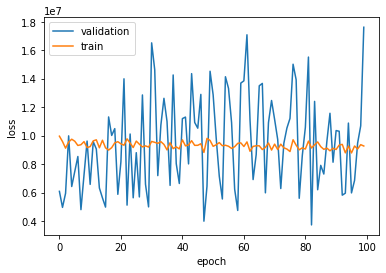

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['validation','train'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
y_pred = model.predict(x_val)
y_pred

array([[14781.517],
       [14605.95 ],
       [14374.143],
       ...,
       [ 8402.218],
       [ 8418.591],
       [ 8432.095]], dtype=float32)

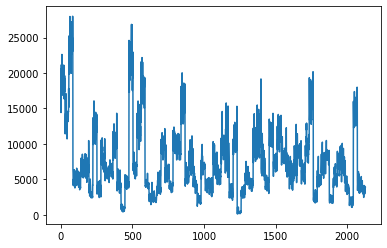

In [ ]:
plt.plot(y_val)

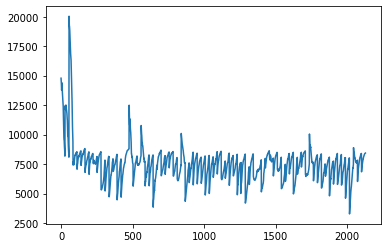

In [ ]:
plt.plot(y_pred)

In [ ]:
import tensorflow as tf
inputs= tf.keras.Input(shape=78)
x= tf.keras.layers.Dense(units=16, activation='relu')(inputs)
x= tf.keras.layers.Dense(units=32)(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x= tf.keras.layers.Dense(units=16, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x= tf.keras.layers.Dense(units=8)(x)
#layer= tf.keras.layers.CategoryEncoding()
outputs=tf.keras.layers.Dense(units=1)(x)
model= tf.keras.Model(inputs=inputs, outputs=outputs, name='Dense')

In [ ]:

model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
history=model.fit(X_train, y_train, epochs=100,batch_size=64 ,validation_data = (X_val,y_val))

Epoch 1/100
118/118 [==============================] - 1s 3ms/step - loss: 5.0058 - val_loss: 0.8143
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.9214 - val_loss: 0.7714
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8143 - val_loss: 0.7690
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.7792 - val_loss: 0.7773
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.7789 - val_loss: 0.7533
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.7683 - val_loss: 0.7546
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.7388 - val_loss: 0.6384
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.4597
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4741 - val_loss: 0.2017
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - loss: 0.3306 - val_lo

Text(0, 0.5, 'loss')

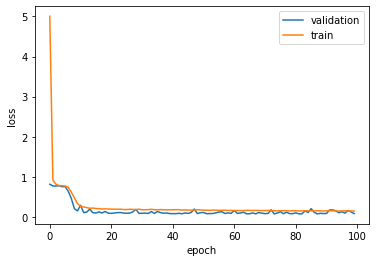

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['validation','train'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
y_pred = model.predict(X_val)
y_pred

array([[ 1.7900816 ],
       [ 1.7886337 ],
       [ 1.787139  ],
       ...,
       [-0.5625889 ],
       [-0.56134   ],
       [-0.57298017]], dtype=float32)

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

array([[ 1.837837 ],
       [ 1.8268572],
       [ 1.8282788],
       ...,
       [-0.6996944],
       [-0.701025 ],
       [-0.704857 ]], dtype=float32)

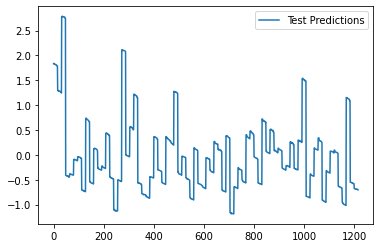

In [ ]:
plt.plot(y_pred_test)
plt.legend(['Test Predictions'])


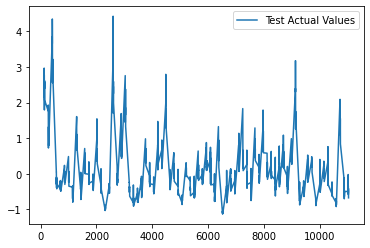

In [ ]:
plt.plot(y_test)
plt.legend(['Test Actual Values'])

In [ ]:
plt.plot

In [ ]:
model.save_weights('/content/drive/MyDrive/')

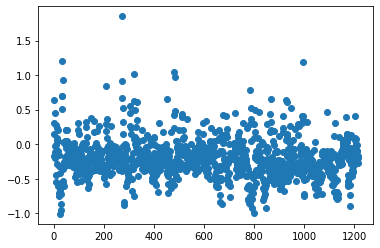

In [ ]:
plt.scatter(range(len(y_test)),y_test-y_pred_test)

In [ ]:
y_pred_test= y_pred_test.flatten()

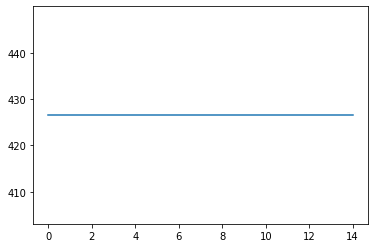

In [ ]:
plt.plot(y_pred_test[:15])

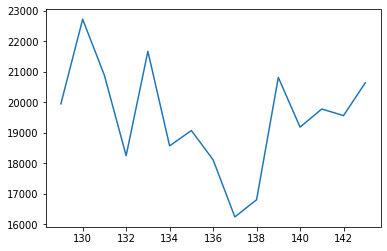

In [ ]:
plt.plot(y_test[:15])

In [ ]:
plt.plot()

In [ ]:

# define the model
model = Sequential()
model.add(Embedding(76, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 4, 8)              608       
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow import keras
inputs = keras.Input(shape=76)
x= Embedding(76, 8, input_length=4, name='Embed_layer')(inputs)
x= Flatten()(x)
outputs= Dense(1)(x)
model=keras.Model(inputs=inputs, outputs=outputs, name="Embed")
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=dummy, y=y, epochs=200)

Epoch 1/200
3/3 [==============================] - 0s 6ms/step - loss: 100847.3984
Epoch 2/200
3/3 [==============================] - 0s 6ms/step - loss: 99458.7422
Epoch 3/200
3/3 [==============================] - 0s 6ms/step - loss: 98048.7109
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 96724.7109
Epoch 5/200
3/3 [==============================] - 0s 7ms/step - loss: 95323.7500
Epoch 6/200
3/3 [==============================] - 0s 6ms/step - loss: 93962.3984
Epoch 7/200
3/3 [==============================] - 0s 6ms/step - loss: 92611.0391
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 91251.5000
Epoch 9/200
3/3 [==============================] - 0s 7ms/step - loss: 89929.9062
Epoch 10/200
3/3 [==============================] - 0s 7ms/step - loss: 88587.0547
Epoch 11/200
3/3 [==============================] - 0s 10ms/step - loss: 87305.8359
Epoch 12/200
3/3 [==============================] - 0s 9ms/step - loss: 85969.2734
Epoch 13/20

In [ ]:
embed_model=model
embed_model.trainable=False

In [ ]:
model.summary()

Model: "Embed"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 76)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 76, 8)             608       
_________________________________________________________________
flatten_4 (Flatten)          (None, 608)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 609       
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train['base_price']=scaler.fit_transform(np.array(train['base_price']).reshape(-1,1))
val['base_price']=scaler.fit_transform(np.array(val['base_price']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def create_dataset(X, y, time_steps=1, weeks=100):
    Xs, ys = [], []
    total=len(X)//weeks # floor division
    for j in range(total):
      
      for i in range(weeks - time_steps):
        i=i+j*weeks
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
x_train,y_train=create_dataset(train.drop('num_orders',axis=1), train['num_orders'], time_steps=2, weeks=100)
x_val, y_val=create_dataset(val.drop('num_orders',axis=1), val['num_orders'], time_steps=2, weeks=30)
x_test, y_test=create_dataset(test.drop('num_orders',axis=1), test['num_orders'], time_steps=2, weeks=16)

In [ ]:
#x_train=np.array(x_train, dtype=float)
#x_val=np.array(x_val, dtype=float)
x_test = np.array(x_test, dtype=float)

In [ ]:
y_train=scaler.fit_transform(y_train.reshape(-1,1))
y_val=scaler.fit_transform(y_val.reshape(-1,1))

In [ ]:
#Successful Architecture 1
from tensorflow import keras
import tensorflow as tf
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers

model = keras.Sequential()
model.add(
    keras.layers.LSTM(
      units=32, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'sigmoid',
      return_sequences = True
    )
  )

'''model.add(keras.layers.Dropout(rate=0.5))
model.add(BatchNormalization())

model.add(
    keras.layers.LSTM(
      units=32, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'tanh',
      return_sequences = True
    )
  )'''

model.add(keras.layers.Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(
    keras.layers.LSTM(
      units=16, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'tanh',
      return_sequences = False
    )
  )

model.add(keras.layers.Dropout(rate=0.5))
model.add(BatchNormalization())

model.add(keras.layers.Dense(units=16))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(16, kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units=1))

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01))

In [ ]:
#Successful Architecture 2
from tensorflow import keras
import tensorflow as tf
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers

model = keras.Sequential()
model.add(
    keras.layers.LSTM(
      units=16, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'sigmoid',
      return_sequences = True
    )
  )

'''model.add(keras.layers.Dropout(rate=0.5))
model.add(BatchNormalization())

model.add(
    keras.layers.LSTM(
      units=32, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'tanh',
      return_sequences = True
    )
  )'''

model.add(keras.layers.Dropout(rate=0.3))
model.add(BatchNormalization())
model.add(
    keras.layers.LSTM(
      units=8, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'tanh',
      return_sequences = False
    )
  )

model.add(keras.layers.Dropout(rate=0.3))
model.add(BatchNormalization())

model.add(keras.layers.Dense(units=16))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(32, kernel_regularizer=regularizers.l2(0.02)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(units=1))

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers

model = keras.Sequential()
model.add(
    keras.layers.LSTM(
      units=16, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'sigmoid',
      return_sequences = True
    )
  )

'''model.add(keras.layers.Dropout(rate=0.5))
model.add(BatchNormalization())

model.add(
    keras.layers.LSTM(
      units=32, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'tanh',
      return_sequences = True
    )
  )'''

model.add(keras.layers.Dropout(rate=0.3))
model.add(BatchNormalization())
model.add(
    keras.layers.LSTM(
      units=8, 
      input_shape=(x_train.shape[1], x_train.shape[2]),
      activation = 'tanh',
      return_sequences = False
    )
  )

model.add(keras.layers.Dropout(rate=0.3))
model.add(BatchNormalization())

model.add(keras.layers.Dense(units=16))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(32, kernel_regularizer=regularizers.l2(0.02)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(units=1))

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
history = model.fit(x=x_train,y=y_train,
          validation_data = (x_val,y_val),
          batch_size=128, epochs=50)

Epoch 1/50
58/58 [==============================] - 4s 16ms/step - loss: 220295.4219 - val_loss: 207897.8125
Epoch 2/50
58/58 [==============================] - 0s 6ms/step - loss: 216992.7969 - val_loss: 204865.4062
Epoch 3/50
58/58 [==============================] - 0s 6ms/step - loss: 200817.9062 - val_loss: 189811.1719
Epoch 4/50
58/58 [==============================] - 0s 7ms/step - loss: 150589.6875 - val_loss: 115920.9453
Epoch 5/50
58/58 [==============================] - 0s 6ms/step - loss: 77645.7109 - val_loss: 47198.7031
Epoch 6/50
58/58 [==============================] - 0s 6ms/step - loss: 47637.6719 - val_loss: 27483.8555
Epoch 7/50
58/58 [==============================] - 0s 6ms/step - loss: 43339.6211 - val_loss: 28777.0195
Epoch 8/50
58/58 [==============================] - 0s 6ms/step - loss: 40475.3711 - val_loss: 28541.3047
Epoch 9/50
58/58 [==============================] - 0s 6ms/step - loss: 38235.2617 - val_loss: 35909.5742
Epoch 10/50
58/58 [==================

In [ ]:
#model.save_weights('/content/drive/MyDrive/LstmSuccess1.h5')

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 2, 16)             6080      
_________________________________________________________________
dropout_72 (Dropout)         (None, 2, 16)             0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 2, 16)             64        
_________________________________________________________________
lstm_33 (LSTM)               (None, 8)                 800       
_________________________________________________________________
dropout_73 (Dropout)         (None, 8)                 0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 8)                 32        
_________________________________________________________________
dense_89 (Dense)             (None, 16)              

In [ ]:
history.history

{'loss': [220295.421875,
  216992.796875,
  200817.90625,
  150589.6875,
  77645.7109375,
  47637.671875,
  43339.62109375,
  40475.37109375,
  38235.26171875,
  35492.8046875,
  34807.57421875,
  33757.90234375,
  32244.32421875,
  31389.39453125,
  29688.572265625,
  29889.53125,
  29735.86328125,
  28194.2109375,
  28332.998046875,
  28055.9375,
  28429.322265625,
  27393.587890625,
  28136.638671875,
  26548.9765625,
  26703.228515625,
  27015.896484375,
  26146.947265625,
  26939.708984375,
  27108.158203125,
  26599.06640625,
  27128.533203125,
  25846.029296875,
  25679.029296875,
  26200.5859375,
  25917.970703125,
  26272.134765625,
  25468.150390625,
  25514.978515625,
  26102.0546875,
  26438.845703125,
  25387.0703125,
  26074.591796875,
  25368.365234375,
  25169.154296875,
  25646.140625,
  25187.59375,
  25557.033203125,
  25809.9921875,
  25307.51953125,
  25547.43359375],
 'val_loss': [207897.8125,
  204865.40625,
  189811.171875,
  115920.9453125,
  47198.703125,
  27

Text(0, 0.5, 'loss')

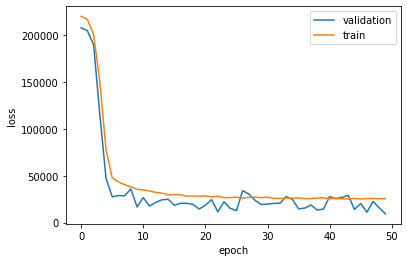

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['validation','train'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
val_pred=model.predict(x_val)
val_pred

array([[597.57935],
       [597.16724],
       [596.6555 ],
       ...,
       [324.28458],
       [324.85715],
       [325.27512]], dtype=float32)

In [ ]:
train_pred=model.predict(x_train)
train_pred

array([[815.9118 ],
       [809.52203],
       [803.78   ],
       ...,
       [544.7185 ],
       [544.36774],
       [540.5391 ]], dtype=float32)

In [ ]:
test_pred = model.predict(x_test)
x_test

array([[[130.        , 346.5075    ,   1.        , ...,   0.        ,
           0.        ,   0.        ],
        [131.        , 341.9834375 ,   1.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[131.        , 341.9834375 ,   1.        , ...,   0.        ,
           0.        ,   0.        ],
        [132.        , 343.8590625 ,   1.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[132.        , 343.8590625 ,   1.        , ...,   0.        ,
           0.        ,   0.        ],
        [133.        , 348.87375   ,   1.        , ...,   0.        ,
           0.        ,   0.        ]],

       ...,

       [[141.        , 273.26692308,   0.        , ...,   0.        ,
           0.        ,   1.        ],
        [142.        , 274.92230769,   0.        , ...,   0.        ,
           0.        ,   1.        ]],

       [[142.        , 274.92230769,   0.        , ...,   0.        ,
           0.        ,   1.        ],
       

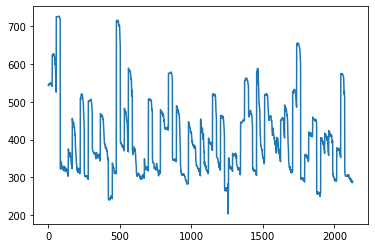

In [ ]:
plt.plot(val_pred)

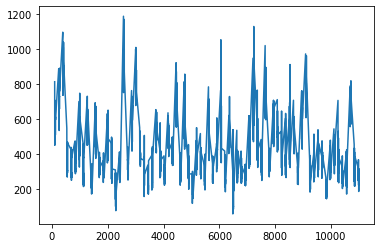

In [ ]:
plt.plot(val['num_orders'])

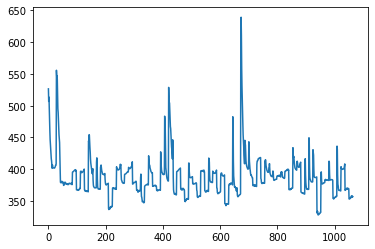

In [ ]:
plt.plot(test_pred)

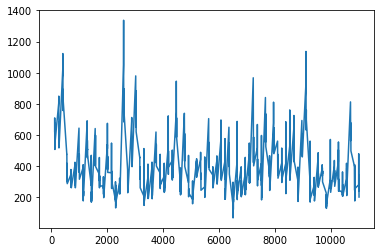

In [ ]:
plt.plot(test['num_orders'])

In [ ]:
test_pred = test_pred.flatten()
test_pred.shape

(1064,)

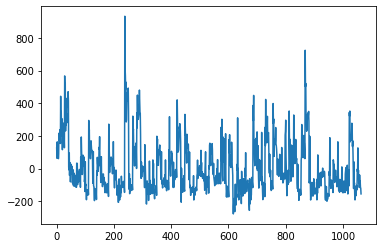

In [ ]:
plt.plot(y_test-test_pred)

In [ ]:
val_pred = val_pred.flatten()
val_pred.shape

(2128,)

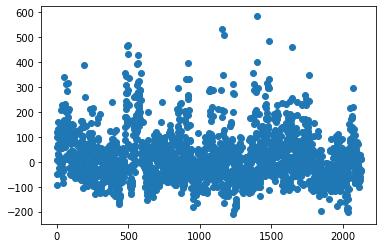

In [ ]:
plt.scatter(range(len(y_val)),y_val-val_pred)

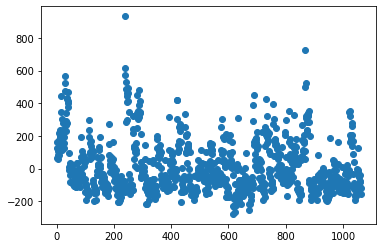

In [ ]:
plt.scatter(range(len(y_test)),y_test-test_pred)

In [ ]:
s